In [118]:
# 사용할 모듈 import 하기
 
import matplotlib.pyplot as plt
import random
from tqdm import tqdm #progress bar

In [119]:
data = []
f=open('iris.data', 'r')

for line in f:
  try:
    items = line.strip().split(",")
    float_items=[float(var) for var in items[:-1]]
    
    data.append((float_items,items[-1]))
  except: pass

data=data[:-1] #마지막 D가 비워져 있기 때문에
print(data)
f.close()

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'), ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'), ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'), ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'), ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'), ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'), ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'), ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'), ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'), ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'), ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'), ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'), ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'), ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'), ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'), ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'), ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'), ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'), ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'), ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'), ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'), ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'), ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'), ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'), ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'), ([5.0, 3.0, 1.6, 0.2], '

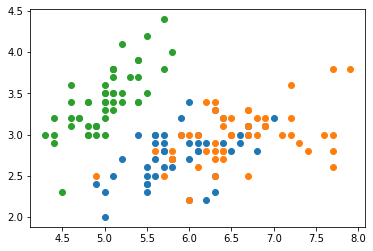

In [120]:
# 데이터 살펴보기

classes={y for x,y in data}  #Iris-~

for c in classes:
  X0=[]
  X1=[]
  for x,y in data:
    if y==c:
      X0.append(x[0])
      X1.append(x[1])
  plt.scatter(X0,X1)


plt.show()

In [121]:
#test 와 Train set 분리

random.shuffle(data)
test=data[:-30]
train=data[-30:]

print(len(test),len(train))


120 30


# KNN

In [122]:
#euclidean distance



def distance(a,b):
  sum=0
  for va,vb in zip(a,b):
    sum+=(vb-va)**2

  return sum**0.5

In [123]:
#전부 거리 구해서 짧은 것

def knn(query,k,train):
  train_with_distance=[]
  for t in train: #train은 data
    d=distance(t[0],query)
    train_with_distance.append((d,t[1]))

  train_with_distance.sort() #첫째 원소로 정렬
  
  candidate=train_with_distance[:k] #k개 자르기
  

  #갯수 세기
  count_classes={}
  for d,c in candidate:
    if c not in count_classes: count_classes[c]=1/(1+d) #가중치
    else: count_classes[c]+=(1/(1+d))
  
  max_val=max(count_classes.items(),key=lambda x: x[1])
  #dict 정렬
  return max_val[0] #제일 마지막 val(큰값) return
  


print(knn(test[0][0],10,train))


Iris-versicolor


# TEST

In [124]:
for k in range(1,100):
  equal_count=0
  for t_vector, ans in test:
    test_case=knn(t_vector,k,train)
    if test_case==ans: equal_count+=1

  accuracy=equal_count/len(test)
  print("정답률: ",accuracy)

정답률:  0.9333333333333333
정답률:  0.9333333333333333
정답률:  0.925
정답률:  0.925
정답률:  0.95
정답률:  0.9333333333333333
정답률:  0.95
정답률:  0.9416666666666667
정답률:  0.925
정답률:  0.9333333333333333
정답률:  0.9083333333333333
정답률:  0.9083333333333333
정답률:  0.8833333333333333
정답률:  0.9083333333333333
정답률:  0.8833333333333333
정답률:  0.9166666666666666
정답률:  0.9333333333333333
정답률:  0.925
정답률:  0.925
정답률:  0.9166666666666666
정답률:  0.9166666666666666
정답률:  0.9166666666666666
정답률:  0.9083333333333333
정답률:  0.9083333333333333
정답률:  0.9083333333333333
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.9
정답률:  0.

100%|██████████| 100/100 [01:09<00:00,  1.43it/s]


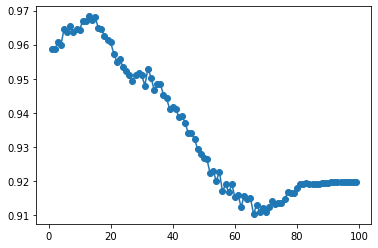

In [125]:
# 통계치..

n_trials=100
k_siz=100
acc_avg=[0]*k_siz

train_siz=int(len(data)*0.8)
test_siz=len(data)-train_siz


for _ in tqdm(range(n_trials)):
  random.shuffle(data)
  test=data[train_siz:]
  train=data[:train_siz]
  

  for k in range(1,k_siz):
    equal_count=0
    for t_vector, ans in test:
      test_case=knn(t_vector,k,train)
      if test_case==ans: equal_count+=1
    
    acc_avg[k]+=equal_count

acc_avg=[ac/(n_trials*len(test)) for ac in acc_avg]


plt.plot(range(1,k_siz),acc_avg[1:],"-o")
plt.show()

In [126]:
list(zip(range(1,k_siz),acc_avg[1:]))

[(1, 0.9586666666666667),
 (2, 0.9586666666666667),
 (3, 0.9606666666666667),
 (4, 0.96),
 (5, 0.9646666666666667),
 (6, 0.9636666666666667),
 (7, 0.9653333333333334),
 (8, 0.9636666666666667),
 (9, 0.9646666666666667),
 (10, 0.9643333333333334),
 (11, 0.967),
 (12, 0.967),
 (13, 0.9683333333333334),
 (14, 0.9673333333333334),
 (15, 0.968),
 (16, 0.965),
 (17, 0.9646666666666667),
 (18, 0.9626666666666667),
 (19, 0.9613333333333334),
 (20, 0.9606666666666667),
 (21, 0.9573333333333334),
 (22, 0.955),
 (23, 0.9556666666666667),
 (24, 0.9533333333333334),
 (25, 0.9523333333333334),
 (26, 0.951),
 (27, 0.9493333333333334),
 (28, 0.951),
 (29, 0.9516666666666667),
 (30, 0.951),
 (31, 0.948),
 (32, 0.953),
 (33, 0.9503333333333334),
 (34, 0.9466666666666667),
 (35, 0.9483333333333334),
 (36, 0.9483333333333334),
 (37, 0.9453333333333334),
 (38, 0.9443333333333334),
 (39, 0.941),
 (40, 0.9416666666666667),
 (41, 0.941),
 (42, 0.9386666666666666),
 (43, 0.939),
 (44, 0.937),
 (45, 0.934),
 (4